In [18]:
%matplotlib inline

# ARMA example using sunpots data

import numpy as np
from scipy import stats
import pandas
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.graphics.api import qqplot


::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



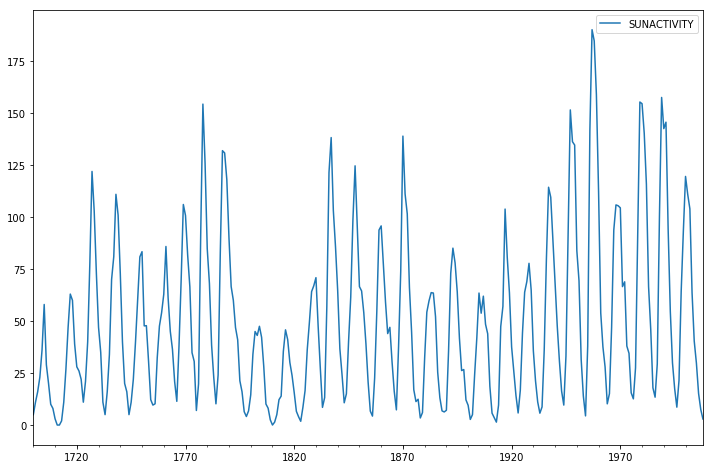

In [17]:
print(sm.datasets.sunspots.NOTE)
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pandas.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]
dta.plot(figsize=(12,8));

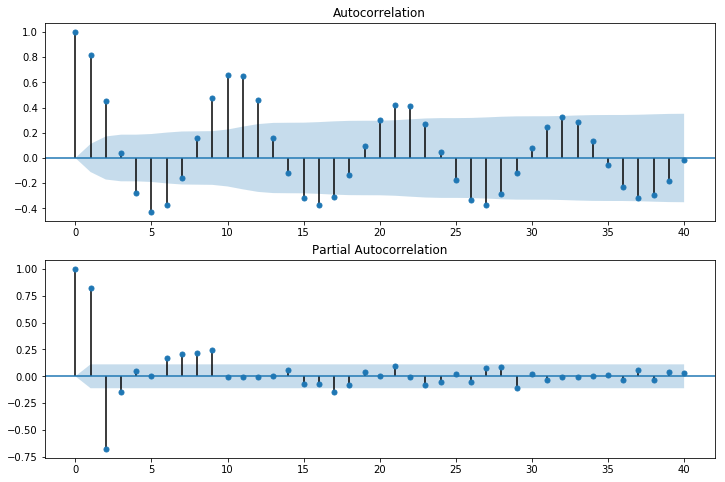

In [16]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

In [8]:
# <codecell>

arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit()
print(arma_mod20.params)

print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)


const                49.659343
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64
2622.6363380639814 2637.56970317 2628.60672591


In [9]:
# <codecell>

arma_mod30 = sm.tsa.ARMA(dta, (3,0)).fit()

# <codecell>

print(arma_mod30.params)

# <codecell>

print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

const                49.749900
ar.L1.SUNACTIVITY     1.300810
ar.L2.SUNACTIVITY    -0.508093
ar.L3.SUNACTIVITY    -0.129649
dtype: float64
2619.4036286966957 2638.07033508 2626.8666135


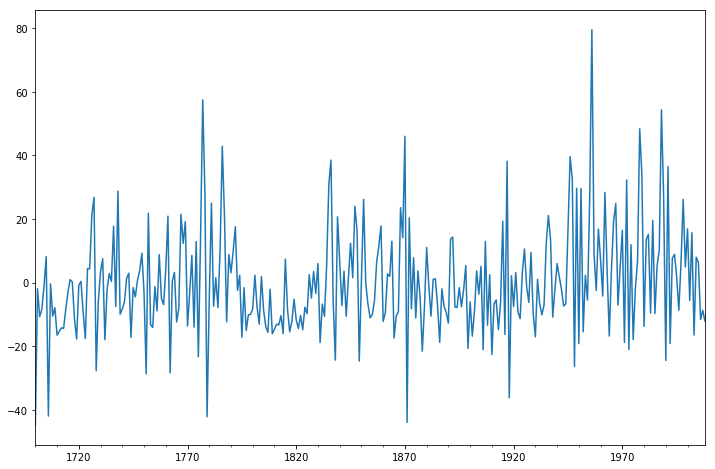

In [12]:
# <markdowncell>

# * Does our model obey the theory?

# <codecell>

sm.stats.durbin_watson(arma_mod30.resid.values)

# <codecell>

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);

In [13]:
resid = arma_mod30.resid
stats.normaltest(resid)

NormaltestResult(statistic=49.84502837307943, pvalue=1.5006852489043021e-11)

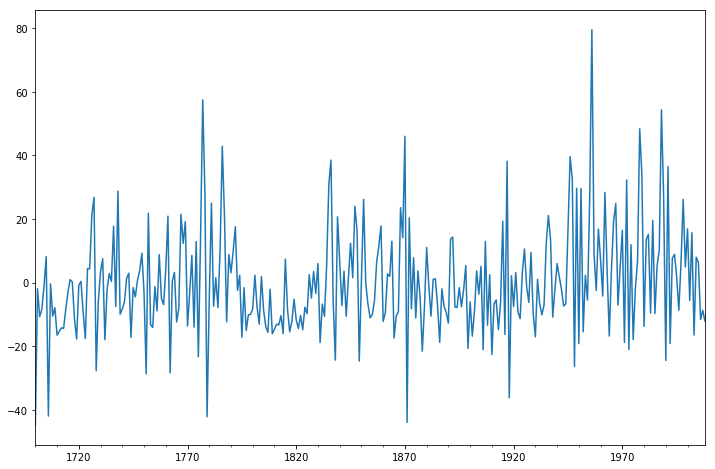

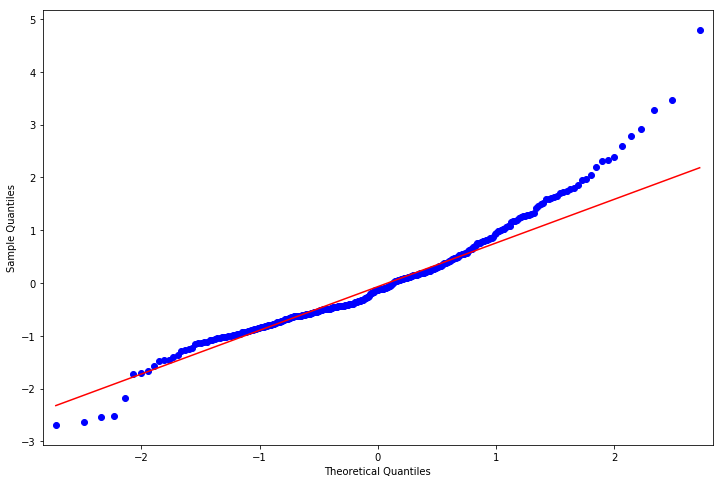

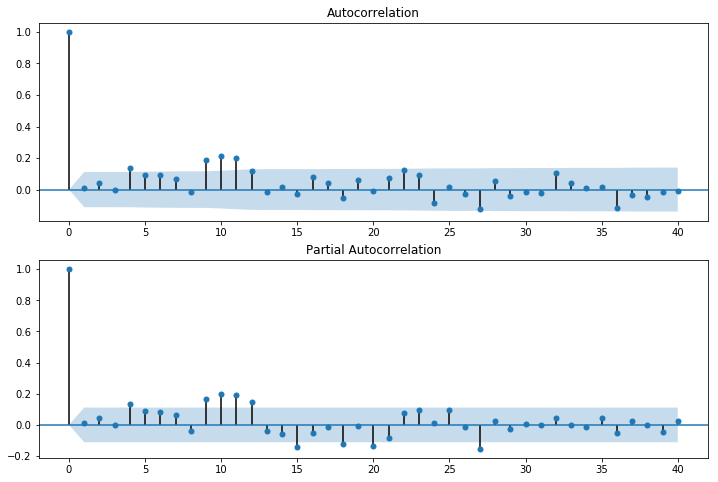

In [11]:
# <codecell>

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

# <codecell>

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

            AC          Q      Prob(>Q)
lag                                    
1.0   0.009179   0.026286  8.712033e-01
2.0   0.041793   0.573043  7.508710e-01
3.0  -0.001335   0.573602  9.024480e-01
4.0   0.136089   6.408918  1.706205e-01
5.0   0.092468   9.111822  1.046862e-01
6.0   0.091948  11.793234  6.674370e-02
7.0   0.068748  13.297190  6.519008e-02
8.0  -0.015020  13.369218  9.976168e-02
9.0   0.187592  24.641899  3.393923e-03
10.0  0.213718  39.321985  2.229482e-05
11.0  0.201082  52.361130  2.344956e-07
12.0  0.117182  56.804183  8.574277e-08
13.0 -0.014055  56.868320  1.893906e-07
14.0  0.015398  56.945559  3.997667e-07
15.0 -0.024967  57.149314  7.741483e-07
16.0  0.080916  59.296763  6.872181e-07
17.0  0.041138  59.853731  1.110947e-06
18.0 -0.052021  60.747422  1.548436e-06
19.0  0.062496  62.041685  1.831647e-06
20.0 -0.010301  62.076972  3.381250e-06
21.0  0.074453  63.926648  3.193592e-06
22.0  0.124955  69.154766  8.978368e-07
23.0  0.093162  72.071031  5.799790e-07


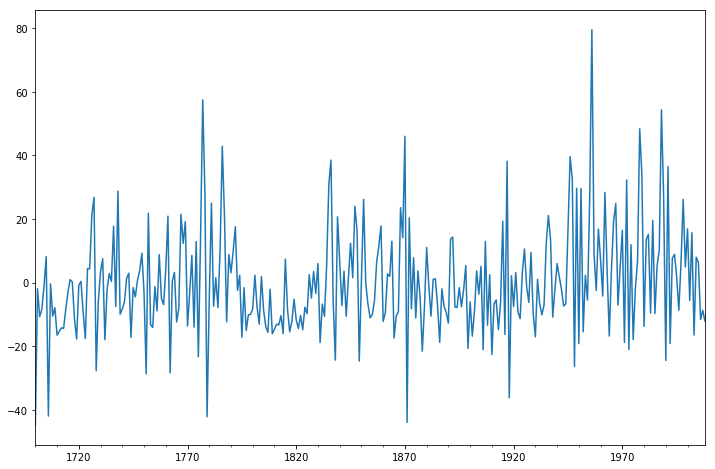

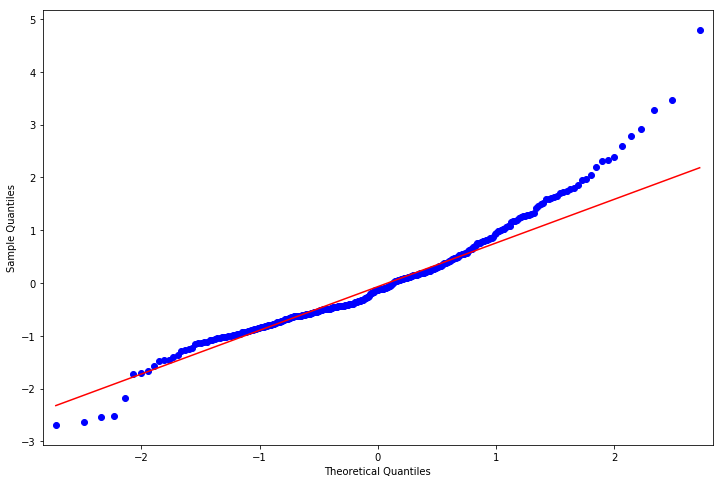

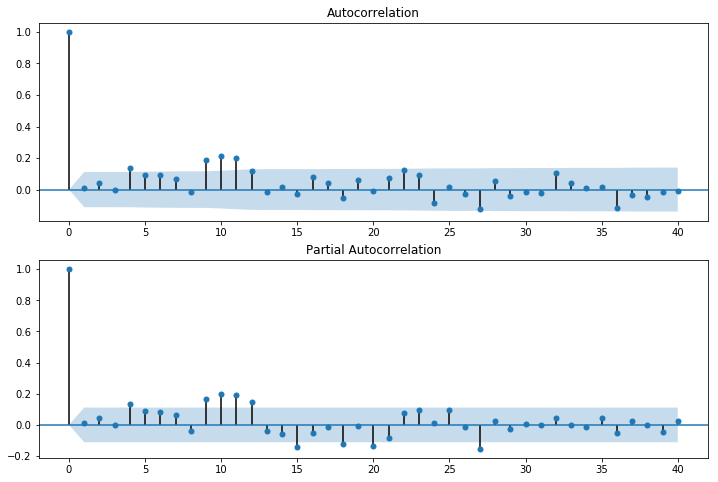

In [10]:
# <codecell>

r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pandas.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

In [3]:
# <markdowncell>

# * This indicates a lack of fit.

# <markdowncell>

# * In-sample dynamic prediction. How good does our model do?

# <codecell>

predict_sunspots = arma_mod30.predict('1990', '2012', dynamic=True)
print predict_sunspots

# <codecell>

ax = dta.ix['1950':].plot(figsize=(12,8))
ax = predict_sunspots.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));

# <codecell>

def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

# <codecell>

mean_forecast_err(dta.SUNACTIVITY, predict_sunspots)

# <headingcell level=3>

# Exercise: Can you obtain a better fit for the Sunspots model? (Hint: sm.tsa.AR has a method select_order)

# <headingcell level=3>

# Simulated ARMA(4,1): Model Identification is Difficult

# <codecell>

from statsmodels.tsa.arima_process import arma_generate_sample, ArmaProcess

# <codecell>

np.random.seed(1234)
# include zero-th lag
arparams = np.array([1, .75, -.65, -.55, .9])
maparams = np.array([1, .65])

# <markdowncell>

# * Let's make sure this models is estimable.

# <codecell>

arma_t = ArmaProcess(arparams, maparams)

# <codecell>

arma_t.isinvertible()

# <codecell>

arma_t.isstationary()

# <rawcell>

# * What does this mean?

# <codecell>

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(arma_t.generate_sample(size=50));

# <codecell>

arparams = np.array([1, .35, -.15, .55, .1])
maparams = np.array([1, .65])
arma_t = ArmaProcess(arparams, maparams)
arma_t.isstationary()

# <codecell>

arma_rvs = arma_t.generate_sample(size=500, burnin=250, scale=2.5)

# <codecell>

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arma_rvs, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arma_rvs, lags=40, ax=ax2)

# <rawcell>

# * For mixed ARMA processes the Autocorrelation function is a mixture of exponentials and damped sine waves after (q-p) lags. 
# * The partial autocorrelation function is a mixture of exponentials and dampened sine waves after (p-q) lags.

# <codecell>

arma11 = sm.tsa.ARMA(arma_rvs, (1,1)).fit()
resid = arma11.resid
r,q,p = sm.tsa.acf(resid, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pandas.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print table.set_index('lag')

# <codecell>

arma41 = sm.tsa.ARMA(arma_rvs, (4,1)).fit()
resid = arma41.resid
r,q,p = sm.tsa.acf(resid, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pandas.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print table.set_index('lag')

# <headingcell level=3>

# Exercise: How good of in-sample prediction can you do for another series, say, CPI

# <codecell>

macrodta = sm.datasets.macrodata.load_pandas().data
macrodta.index = pandas.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
cpi = macrodta["cpi"]

# <headingcell level=4>

# Hint: 

# <codecell>

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = cpi.plot(ax=ax);
ax.legend();

# <rawcell>

# P-value of the unit-root test, resoundly rejects the null of no unit-root.

# <codecell>

print sm.tsa.adfuller(cpi)[1]

Contact GitHub API Training Shop Blog About
© 2017 GitHub, Inc. Terms Privacy Security Status Help

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-3-dc8da7271502>, line 50)